In [1]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Gauss_dist,Divide_cont, Cluster_fit,Likelihood_contours
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [23]:
'''Construct simulated cluster spectra'''
ngc=Cluster('../clusters/ngc6528_griz_err_1.1.npy',1.1)
ngc.Remove_continuum()
sim_gc = Cluster_model(0.015,11.0,0,1.1,ngc.nc_wv*(1 + ngc.redshift), ngc.nc_fl, ngc.nc_er)
sim_gc.Simulate_cluster()
sim_gc.Remove_continuum(use_sim=True)
sim_gc.Remove_continuum()

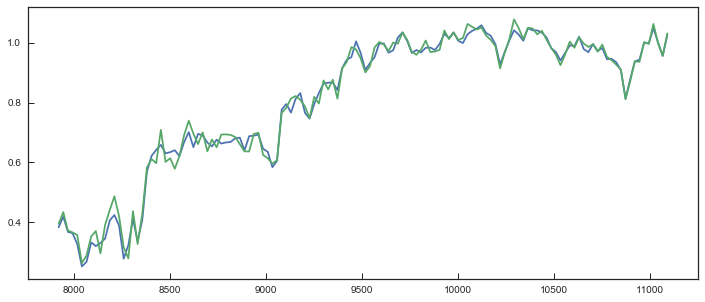

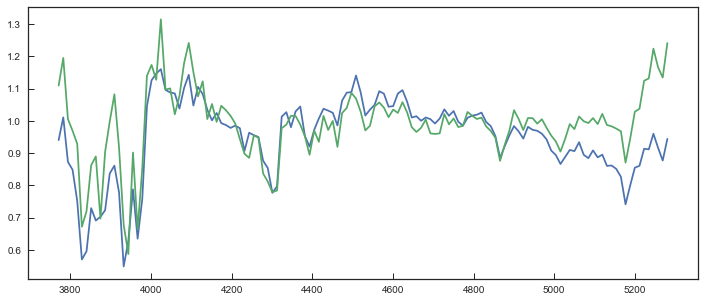

In [25]:
'''check simulated spectra'''
%matplotlib inline

plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl)
plt.plot(sim_gc.simwv,sim_gc.simfl)
plt.show()
plt.close()

plt.figure(figsize=[12,5])
plt.plot(sim_gc.nc_wv,sim_gc.nc_fl)
plt.plot(sim_gc.nc_simwv,sim_gc.nc_simfl)
plt.show()
plt.close()

In [30]:
def Get_cont(wave,flux, z):
    IDx = [U for U in range(len(wave)) if 7500 < wave[U] < 11500]

    wv = wave[IDx]
    fl = flux[IDx]

    w = wv / (1 + z)

    m2r = [3800, 3850, 3910, 4030, 4080, 4125, 4250, 4385, 4515, 4570, 4810, 4910, 4975, 5055, 5110, 5285]

    Mask = np.zeros(len(w))
    for i in range(len(Mask)):
        if m2r[0] <= w[i] <= m2r[1]:
            Mask[i] = 1
        if m2r[2] <= w[i] <= m2r[3]:
            Mask[i] = 1
        if m2r[4] <= w[i] <= m2r[5]:
            Mask[i] = 1
        if m2r[6] <= w[i] <= m2r[7]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[10] < w[i] <= m2r[11]:
            Mask[i] = 1
        if m2r[12] <= w[i] <= m2r[13]:
            Mask[i] = 1
        if m2r[14] <= w[i] <= m2r[15]:
            Mask[i] = 1

    maskw = np.ma.masked_array(w, Mask)

    params = np.ma.polyfit(maskw, fl, 3)
    C0 = np.polyval(params, w)

    return w*(1+z), C0

In [31]:
mwv,Cm = Get_cont(sim_gc.wv,sim_gc.fl,1.1)
swv,Cs = Get_cont(sim_gc.simwv,sim_gc.simfl,1.1)

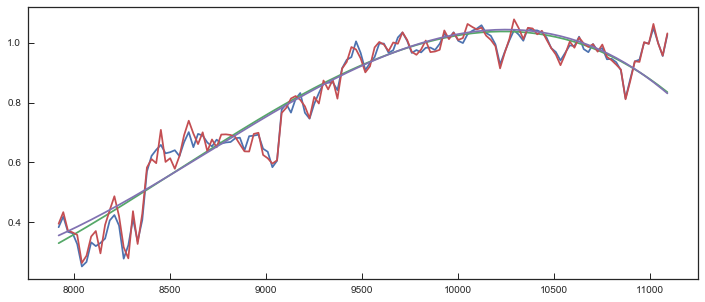

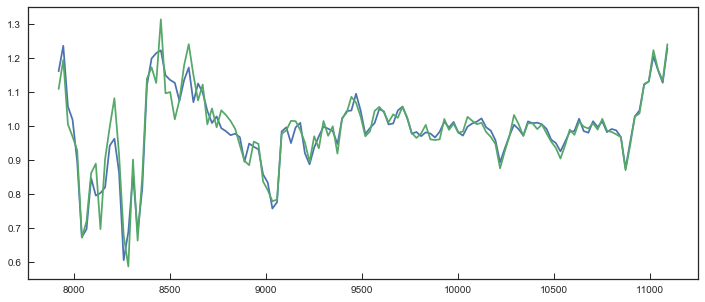

In [35]:
plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl)
plt.plot(mwv,Cm)
plt.plot(sim_gc.simwv,sim_gc.simfl)
plt.plot(swv,Cs)
plt.show()
plt.close()

plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl/Cm)
plt.plot(sim_gc.simwv,sim_gc.simfl/Cs)
plt.show()
plt.close()

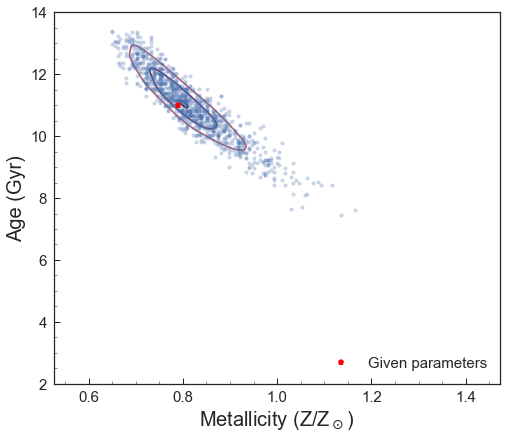

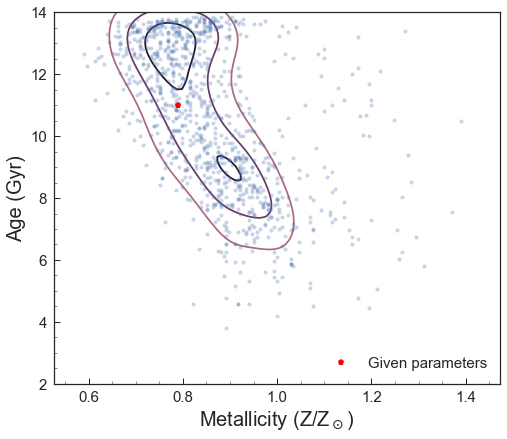

In [75]:
%matplotlib inline
colmap = sea.cubehelix_palette(12, start=3, rot=0.5, dark=0.1, light=.5, as_cmap=True)
mlist,alist = np.load('../mcerr/sim6528_1.1_mcerr.npy')
ncmlist,ncalist = np.load('../mcerr/sim6528_1.1_nc_mcerr.npy')

plt.figure(figsize=[8,8])
plt.plot(mlist/.019,alist,'o',alpha=.3,ms=4)
sea.kdeplot(mlist/.019,alist,n_levels=3,cmap=colmap)
plt.plot(0.015/.019,11,'rp',label='Given parameters')
plt.axis([0.01/.019,.028/.019,2,14])
plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
plt.ylabel('Age (Gyr)',fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.legend(loc=4,fontsize=15)
plt.minorticks_on()
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(ncmlist/.019,ncalist,'o',alpha=.3,ms=4)
sea.kdeplot(ncmlist/.019,ncalist,n_levels=3,cmap=colmap)
plt.plot(0.015/.019,11,'rp',label='Given parameters')
plt.axis([0.01/.019,.028/.019,2,14])
plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
plt.ylabel('Age (Gyr)',fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.legend(loc=4,fontsize=15)
plt.minorticks_on()
plt.show()
plt.close()